In [1]:
from Processing.data_handler import DataProcessor, DataProcessor_Ball
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_PID_comparison(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    rpm_vals = df["CurrRpm"]
    set_rpm = df["SetPoint"]
        
    rpm_vals = rpm_vals.iloc[3:]
    set_rpm = set_rpm.iloc[3:]
    time_vals = time_vals.iloc[3:]
    
    plt.plot(time_vals, rpm_vals)
    plt.plot(time_vals, set_rpm)
    plt.title("Detected Rpm vs Set Rpm")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("RPM")

def plot_BallPID_comparison(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    pwm_kp = df["KpContrib"]
    pwm_ki = df["KiContrib"]
    pwm_kd = df["KdContrib"]
    pwm_vals = pwm_kp + pwm_ki + pwm_kd
    set_rpm = df["SetPoint"]

    pwm_kp = pwm_kp.iloc[3:]
    pwm_ki = pwm_ki.iloc[3:]
    pwm_kd = pwm_kd.iloc[3:]
    pwm_vals = pwm_vals.iloc[3:]
    set_rpm = set_rpm.iloc[3:]
    time_vals = time_vals.iloc[3:]
    
    plt.plot(time_vals, pwm_kp, label = 'Kp Term')
    plt.plot(time_vals, pwm_ki, label = 'Ki Term')
    plt.plot(time_vals, pwm_kd, label = 'Kd Term')
    plt.plot(time_vals, set_rpm, label = 'ball err')
    plt.title("PWM vs Ball Err")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("A.U.")
    plt.legend()

def plot_BallPID_comparison(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    pwm_kp = df["KpContrib"]
    pwm_ki = df["KiContrib"]
    pwm_kd = df["KdContrib"]
    pwm_kw = df["KwContrib"]
    pwm_vals = pwm_kp + pwm_ki + pwm_kd
    set_rpm = df["SetPoint"]

    pwm_kp = pwm_kp.iloc[3:]
    pwm_ki = pwm_ki.iloc[3:]
    pwm_kd = pwm_kd.iloc[3:]
    pwm_kw = pwm_kw.iloc[3:]
    pwm_vals = pwm_vals.iloc[3:]
    set_rpm = set_rpm.iloc[3:]
    time_vals = time_vals.iloc[3:]
    
    plt.plot(time_vals, pwm_kp, label = 'Kp Term')
    plt.plot(time_vals, pwm_ki, label = 'Ki Term')
    plt.plot(time_vals, pwm_kd, label = 'Kd Term')
    plt.plot(time_vals, pwm_kw, label = 'Kw Term')
    plt.plot(time_vals, set_rpm, label = 'ball err')
    plt.title("PWM vs Ball Err")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("A.U.")
    plt.legend()
    plt.show()
    
    plt.plot(time_vals, pwm_kp+pwm_ki+pwm_kd+pwm_kw, label = 'Total control signal PWM')
    plt.plot(time_vals, set_rpm, label = 'ball err')
    plt.title("Total contrlo signal PWM vs Ball Err")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("A.U.")
    plt.legend()


def plot_PWM_test_results(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    rpm_vals = df["CurrRpm"]
    pwm_vals = df["KpContrib"] + df["KiContrib"] + df["KdContrib"] + df["KwContrib"]
    
    rpm_vals = rpm_vals.iloc[6:]
    pwm_vals = pwm_vals.iloc[6:]
    time_vals = time_vals.iloc[6:]
    print(rpm_vals.mean())

    plt.plot(time_vals, rpm_vals, label = 'rpm')
    plt.plot(time_vals, pwm_vals, label = 'pwm')
    plt.title("Detected Rpm vs PWM Val")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("RPM or PWM Val")
    plt.legend()

def plot_loop_closure_times_wheel(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    loop_vals = df["LoopTimes"]

    time_vals = time_vals.iloc[3:]
    loop_vals = loop_vals.iloc[3:]
    plt.plot(time_vals, loop_vals)

    plt.title("Loop Closure Times")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("Loop Times in S")

def plot_encoder_difference_vals(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    enc_vals = df["DeltEncoder"]

    time_vals = time_vals.iloc[3:]
    enc_vals = enc_vals.iloc[3:]
    plt.plot(time_vals, enc_vals)

    plt.title("Encoder Val Changes")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("Encoder Change in Ticks")

def plot_loop_closure_times_ball(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    loop_vals = df["LoopTimes"]
    time_vals = time_vals.iloc[3:]
    loop_vals = loop_vals.iloc[3:]
    plt.plot(time_vals, loop_vals)
    plt.title("CV Processing Closure Times")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("Loop Times in S")

def plot_ball_pos_errs(df):
    time_vals = df["CurrTime"]
    time_vals = time_vals - time_vals.iloc[0]
    loop_vals = df["PositionErr"]
    plt.plot(time_vals, loop_vals)
    plt.title("Deviation from the Center")
    plt.xlabel("Time in Seconds from Start Up")
    plt.ylabel("Pixels")

Processing/Logs/2024-03-18_11-36-01.csv


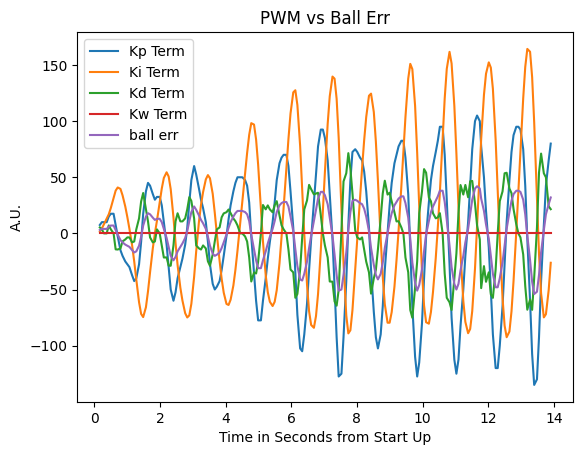

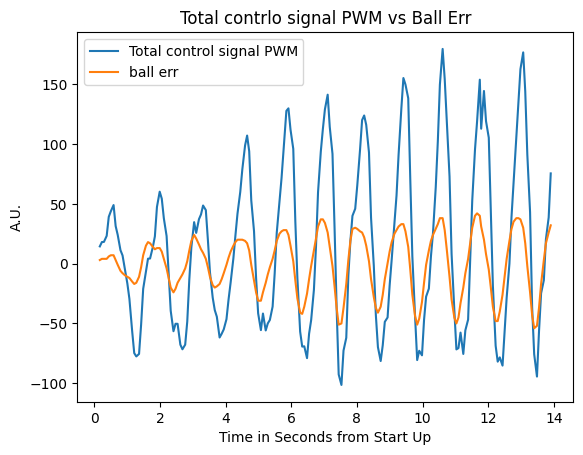

In [3]:
data_processor = DataProcessor()
last_log = data_processor.get_last_log()
print(last_log)
df = data_processor.get_last_frame()
plot_BallPID_comparison(df.head(200))

Index(['Unnamed: 0', 'DeltEncoder', 'LoopTimes', 'CurrRpm', 'SetPoint',
       'CurrTime', 'KpContrib', 'KiContrib', 'KdContrib', 'KwContrib'],
      dtype='object')


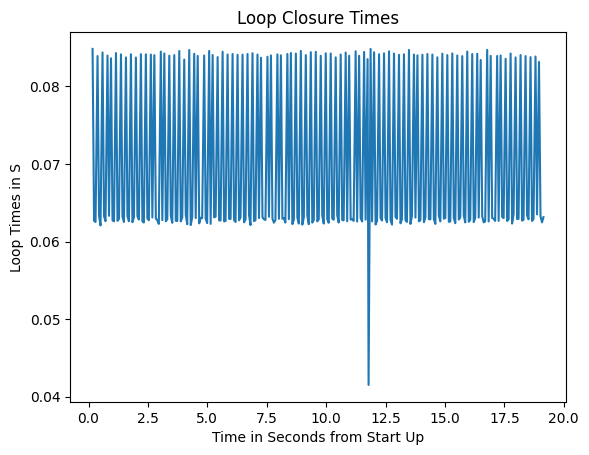

In [4]:
plot_loop_closure_times_wheel(df)
print(data_processor.get_headers(df))

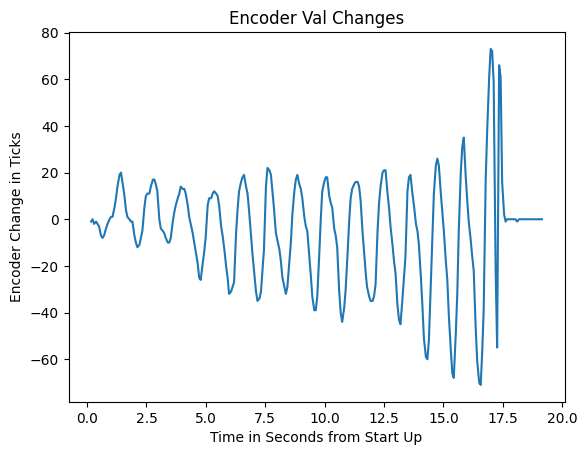

In [5]:
plot_encoder_difference_vals(df)

-1.7837774542368612


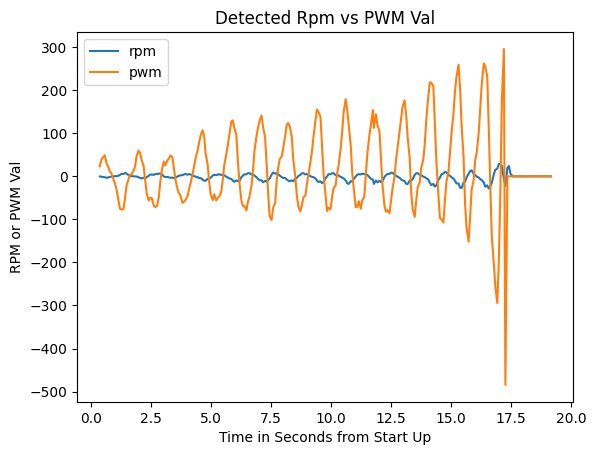

In [6]:
plot_PWM_test_results(df)

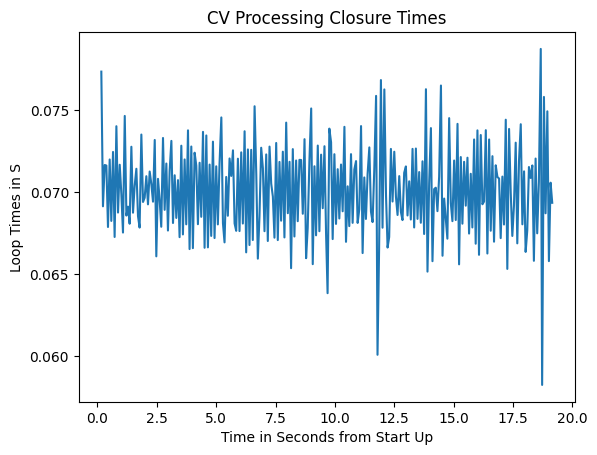

In [7]:
data_processor_ball = DataProcessor_Ball()
last_log = data_processor_ball.get_last_log()
df = data_processor_ball.get_last_frame()
headers = data_processor_ball.get_headers(df)
plot_loop_closure_times_ball(df)

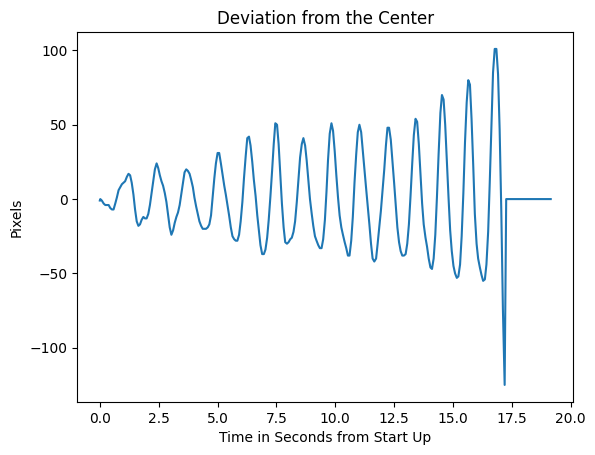

In [8]:
plot_ball_pos_errs(df)

### Motor Characterization
Here is the plot to get the motor characterization.

In [9]:
motor_data = pd.read_csv("Processing/pwm.csv")

Text(0, 0.5, 'Steady State RPM')

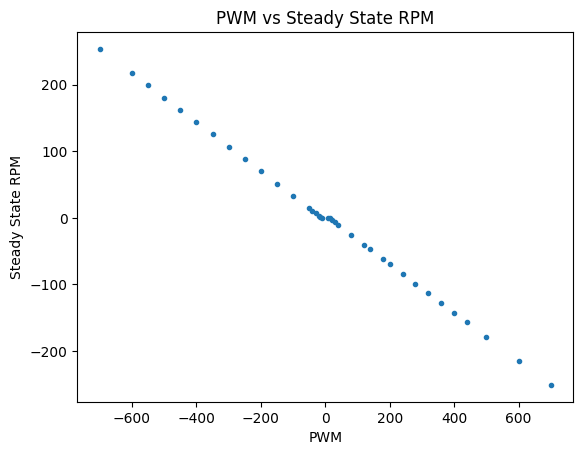

In [10]:
pwm = motor_data["pwm"]
rpm = motor_data["rpm"]
plt.plot(pwm,rpm,'.')
plt.title("PWM vs Steady State RPM")
plt.xlabel("PWM")
plt.ylabel("Steady State RPM")

In [11]:
import numpy as np
print(np.polyfit(pwm,rpm,1))

[-0.3581942   0.51038215]
